In [19]:
# Importing Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
!pip install imblearn

In [2]:
# Reading the File

df = pd.read_csv("C:/Users/DELL/Desktop/Project/P78 -- Bankruptcy Prevention/bankruptcy.csv",delimiter=';')
df.head()

industrial_risk   management_risk   financial_flexibility   credibility  \
0              0.5               1.0                     0.0           0.0   
1              0.0               1.0                     0.0           0.0   
2              1.0               0.0                     0.0           0.0   
3              0.5               0.0                     0.0           0.5   
4              1.0               1.0                     0.0           0.0   

    competitiveness   operating_risk       class  
0               0.0              0.5  bankruptcy  
1               0.0              1.0  bankruptcy  
2               0.0              1.0  bankruptcy  
3               0.0              1.0  bankruptcy  
4               0.0              1.0  bankruptcy

In [3]:
# Checking Dataset - for Null Values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [4]:
# ---- Their are no null - values in the dataset

In [5]:
#Encoding Categorical variable to Numbers

labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:,-1])
df.head()

industrial_risk   management_risk   financial_flexibility   credibility  \
0              0.5               1.0                     0.0           0.0   
1              0.0               1.0                     0.0           0.0   
2              1.0               0.0                     0.0           0.0   
3              0.5               0.0                     0.0           0.5   
4              1.0               1.0                     0.0           0.0   

    competitiveness   operating_risk   class  
0               0.0              0.5       0  
1               0.0              1.0       0  
2               0.0              1.0       0  
3               0.0              1.0       0  
4               0.0              1.0       0

In [6]:
# Correlation Analysis

df.corr()

industrial_risk   management_risk  \
industrial_risk                1.000000          0.255127   
 management_risk               0.255127          1.000000   
 financial_flexibility        -0.162624         -0.254845   
 credibility                  -0.014438         -0.303341   
 competitiveness              -0.257814         -0.306568   
 operating_risk                0.144507          0.213874   
 class                        -0.227823         -0.370838   

                         financial_flexibility   credibility  \
industrial_risk                      -0.162624     -0.014438   
 management_risk                     -0.254845     -0.303341   
 financial_flexibility                1.000000      0.524951   
 credibility                          0.524951      1.000000   
 competitiveness                      0.686612      0.675689   
 operating_risk                      -0.116903     -0.288458   
 class                                0.751020      0.755909   

                         competitiveness   operating_risk     class  
industrial_risk                -0.257814         0.144507 -0.227823  
 management_risk               -0.306568         0.213874 -0.370838  
 financial_flexibility          0.686612        -0.116903  0.751020  
 credibility                    0.675689        -0.288458  0.755909  
 competitiveness                1.000000        -0.211383  0.899452  
 operating_risk                -0.211383         1.000000 -0.279786  
 class                          0.899452        -0.279786  1.000000

In [7]:
# Their is strong Correlation between competitiveness & class Variable

In [8]:
# Checking Duplicate Values

df[df.duplicated()].shape

(147, 7)

In [9]:
# Droping duplicate Values

df1=df.drop_duplicates()
df1.head()

industrial_risk   management_risk   financial_flexibility   credibility  \
0              0.5               1.0                     0.0           0.0   
1              0.0               1.0                     0.0           0.0   
2              1.0               0.0                     0.0           0.0   
3              0.5               0.0                     0.0           0.5   
4              1.0               1.0                     0.0           0.0   

    competitiveness   operating_risk   class  
0               0.0              0.5       0  
1               0.0              1.0       0  
2               0.0              1.0       0  
3               0.0              1.0       0  
4               0.0              1.0       0

In [10]:
df1.shape

(103, 7)

In [11]:
df.nunique()

industrial_risk           3
 management_risk          3
 financial_flexibility    3
 credibility              3
 competitiveness          3
 operating_risk           3
 class                    2
dtype: int64

In [12]:
# Changing Column Names

df2=df1.rename({" management_risk":"management_risk"," financial_flexibility":"financial_flexibility"," credibility":"credibility"," competitiveness":"competitiveness"," operating_risk":"operating_risk"," class":"Target"},axis=1)
df2.head()

industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   
2              1.0              0.0                    0.0          0.0   
3              0.5              0.0                    0.0          0.5   
4              1.0              1.0                    0.0          0.0   

   competitiveness  operating_risk  Target  
0              0.0             0.5       0  
1              0.0             1.0       0  
2              0.0             1.0       0  
3              0.0             1.0       0  
4              0.0             1.0       0

<AxesSubplot:>

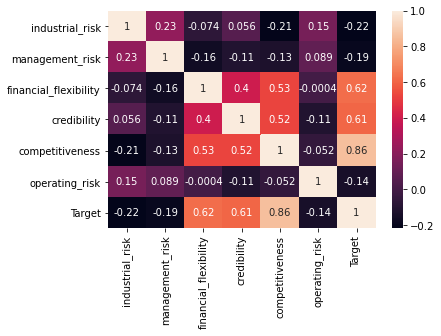

In [13]:
# Checking Correlation

correlation = df2.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

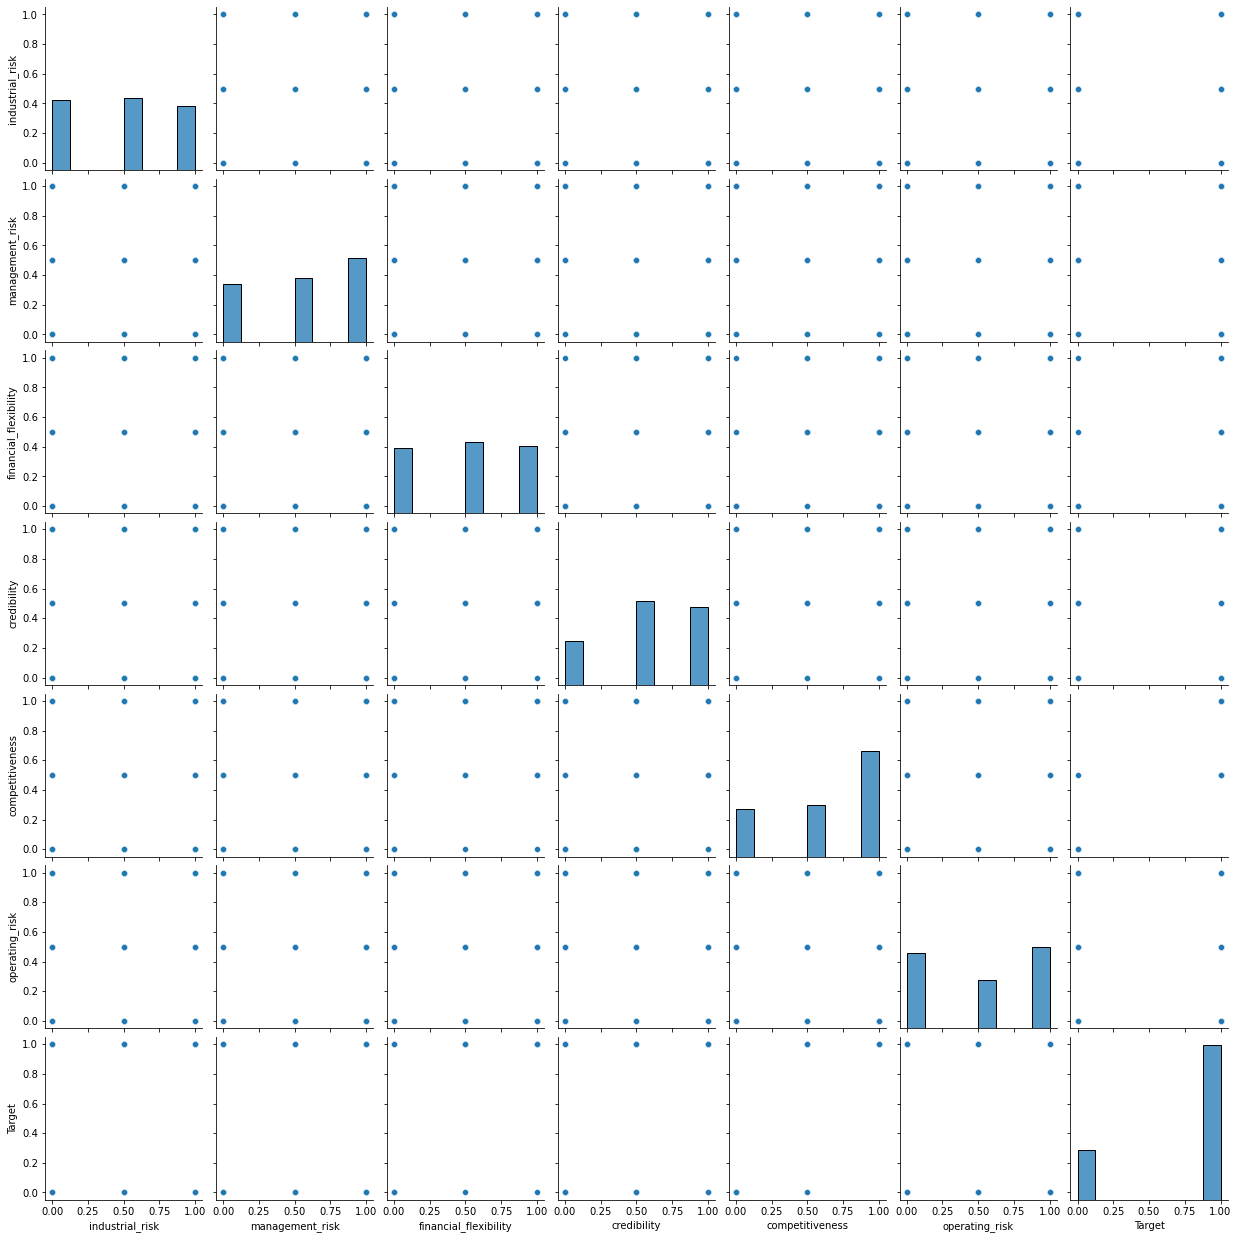

In [16]:
# Checking Pair Plot

sns.pairplot(df2)

In [15]:
# Checking Target class distribution

y=df2['Target']
y.value_counts()

1    78
0    25
Name: Target, dtype: int64

<AxesSubplot:ylabel='Target'>

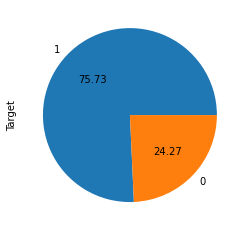

In [17]:
# Pie Plot Visual

y.value_counts().plot.pie(autopct='%.2f')

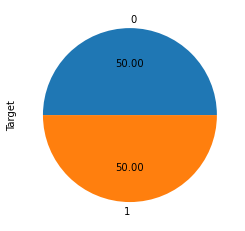

In [41]:
# Making Data Balance
# Random Under Sampling to make Balance Data

x = df2.drop(['Target'],axis=1)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy = 1) # In range 0 & 1 
x_res,y_res = rus.fit_resample(x,y)
                         
ax = y_res.value_counts().plot.pie(autopct='%.2f')

In [30]:
y_res.value_counts()

0    25
1    25
Name: Target, dtype: int64

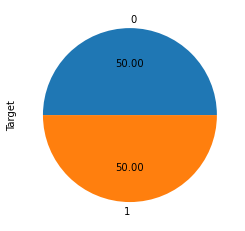

In [34]:
# Random Over Sampling to make Balance Data

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy =1)
x_res,y_res = ros.fit_resample(x,y)
                         
ax = y_res.value_counts().plot.pie(autopct='%.2f')


In [35]:
y_res.value_counts()

0    78
1    78
Name: Target, dtype: int64